# Zomato - Understanding Restaurants Better
## by Adham Gad

## Investigation Overview

In this analysis, I'm mainly interested in two restaurant characterstics **ratings** & **cuisines** and how all other restaurant characterstics relate to them. For this presentation I will show how my two variables of interest relate to restaurant prices

## Dataset Overview

This dataset was downloaded from Kaggle and provided by Zomato. It contains restaurants info, cuisines, prices and ratings. After cleaning and dropping some unwanted columns the dataset contains 9551 rows and 13 features.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
restaurants_original = pd.read_csv("zomato.csv", encoding="ISO-8859-1")

In [4]:
# Restaurants data preparation
restaurants_df = restaurants_original.copy()
restaurants_df.columns = restaurants_df.columns.str.replace(" ","_")
restaurants_df.columns = restaurants_df.columns.str.lower()
restaurants_df.restaurant_id = restaurants_df.restaurant_id.astype("str")

ratings = ["Not rated", "Poor", "Average", "Good","Very Good","Excellent"]
ratings = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ratings)
restaurants_df["rating_text"] = restaurants_df["rating_text"].astype(ratings)

price_range = [1,2,3,4]
price_range = pd.api.types.CategoricalDtype(ordered= True, categories = price_range)
restaurants_df.price_range = restaurants_df.price_range.astype(price_range)

restaurants_df = restaurants_df.drop(["country_code","address","locality_verbose","longitude","latitude","aggregate_rating","rating_color", "switch_to_order_menu"], axis = 1)
restaurants_df.rename(columns = {"rating_text":"rating"}, inplace= True)
restaurants_df = restaurants_df[restaurants_df.currency == "Indian Rupees(Rs.)"] # drop all other currencies



In [5]:
# Cuisines data preparation
cuisines_df = restaurants_df.copy()
cuisines = cuisines_df.cuisines.str.split(",").apply(pd.Series).stack()
cuisines.index = cuisines.index.droplevel(-1)
cuisines.name = "cuisine"
cuisines_df = cuisines_df.join(cuisines)
cuisines_df.cuisine = cuisines_df.cuisine.str.strip()


## Distribution of Ratings

Originally ratings are distributed between six categories, **Not rated**, **Poor**, **Average**, **Good**, **Very Good** & **Excellent**. 
**Not rated** values will be dropped and we will focus on the other 5 ratings as we continue our analysis

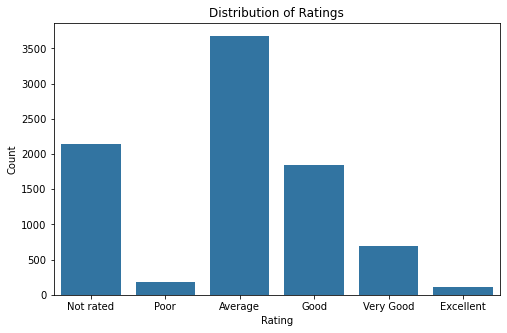

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
plt.title("Distribution of Ratings")
sb.countplot(data = restaurants_df, x = "rating", color = base_color);
plt.xlabel('Rating');
plt.ylabel('Count');

## Distribution of Average cost for two

The below distribution represents restaurants average cost for two persons. The distribution is positively skewed, this skewness represents some overpriced restaurants, nothing strange was found with these restaurants also it's normal in this domain to have overpriced restaurants and it will be useful later in our analysis as we'll show high and low value for money restaurants.

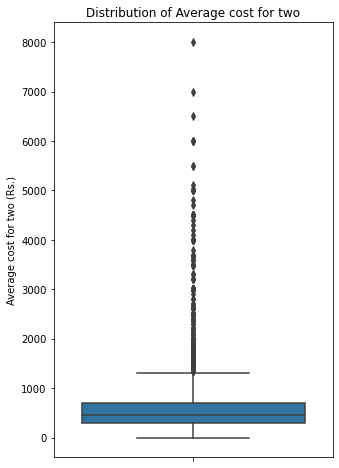

In [7]:
plt.figure(figsize = (5,8))
plt.title("Distribution of Average cost for two")
sb.boxplot(data = restaurants_df, y = 'average_cost_for_two', color = base_color);
plt.ylabel("Average cost for two (Rs.)");

In [8]:
restaurants_df = restaurants_df.loc[restaurants_df.rating != "Not rated"]
cuisines_df = cuisines_df.loc[cuisines_df.rating != "Not rated"]

new_ratings = ["Poor", "Average", "Good","Very Good","Excellent"]
ratings = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = new_ratings)
restaurants_df["rating"] = restaurants_df["rating"].astype(ratings)
cuisines_df["rating"] = cuisines_df["rating"].astype(ratings)

## Ratings vs Average cost for two
There is a positive correlation between the average cost of restaurants and their ratings, restaurants of higher cost tend to have higher ratings. This suggests the fact the more restaurants charge for their service the more the quality will be better and that's why people give higher ratings

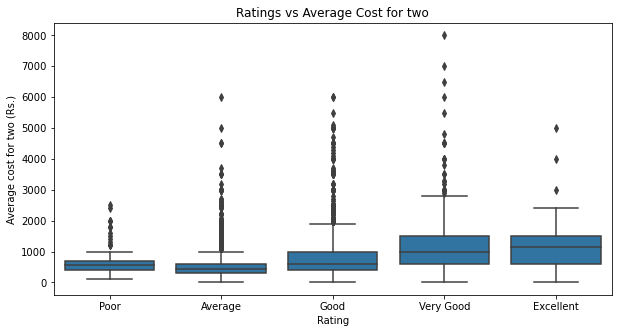

In [9]:
plt.figure(figsize = (10,5))
plt.title("Ratings vs Average Cost for two")
sb.boxplot(data = restaurants_df, x = 'rating', y = 'average_cost_for_two', color = base_color)
plt.ylabel("Average cost for two (Rs.)")
plt.xlabel("Rating");

## Restaurant value for money

Outliers are useful as we can extract Poor & Average restaurants that cost alot, and recommend to users not to try them, and extract the outliers that standout in Excellent/Very Good categories and recommend them as they are good value for money and safe to try

> **Chicane** & **Nostalgia at 1911 Brasserie - The Imperial** restaurants have the low value for money 

> **Orient Express - Taj Palace Hotel** & **Masala Library**  restaurants have high value for money 

## Top 10 Indian cuisines

* Interestingly North Indian food is more common or than South Indian food, as North Indian comes in the 1st and and South Indian comes in the 8th place.

* Also **Mughlai** is a unique cuisine introduced here. It's an Indian, Turkish/Persian influenced cuisine and a common one as it's in the fourth place. 

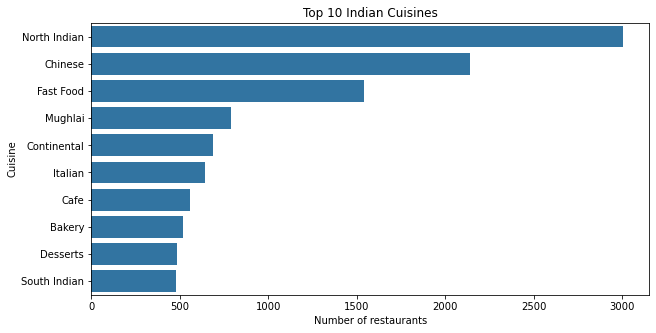

In [10]:
top_10_cuisines = cuisines_df.cuisine.value_counts().index[:10]
plt.figure(figsize = (10,5))
plt.title("Top 10 Indian Cuisines")
sb.countplot(data = cuisines_df, y = "cuisine", order = top_10_cuisines, color = base_color);
# plt.xticks("Number of restaurants")
plt.ylabel("Cuisine")
plt.xlabel("Number of restaurants");

## Cuisines vs Average cost for two

* North Indian and chinese cuisines have pretty similar price ranges.
* Mughlai is close to chinese & North Indian cuisines with a narrower distribution of prices
* Italian and Continental cuisines are also similar in price ranges, they tend to be of higher price.
* Fast Food and South Indian have similar price ranges they tend to be at medium - low category
* Bakery and Desserts have similar price ranges they tend to be at medium - low category, also desserts tend to be higher in prices
* Also South indian cuisine tend to be more cheaper than North indian cuisine

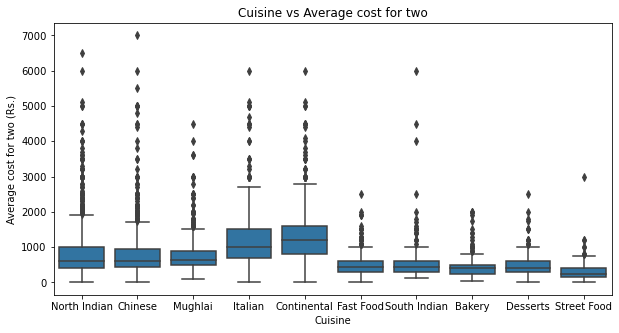

In [11]:
cuisines_order = ['North Indian', 'Chinese', 'Mughlai','Italian', 'Continental', 'Fast Food','South Indian', 'Bakery'
       , 'Desserts', 'Street Food']
plt.figure(figsize = (10,5))
plt.title("Cuisine vs Average cost for two")
sb.boxplot(data = cuisines_df, x = 'cuisine', y = 'average_cost_for_two', color = base_color, order = cuisines_order)
plt.ylabel("Average cost for two (Rs.)")
plt.xlabel("Cuisine");

## Ratings vs Average cost for two per Cuisine 

Generally restaurants which charge higher for their services, will get better ratings as previously shown. This is apparent here in most cuisines with few anomalies

* Italian cuisine have some Excellent restaurants falling in lower price ranges

* Continental restaurants rated as Poor have very high costs, these restaurants can be recommended to users suggesting a very low value for money.

* There is no street food restaurants rated as Excellent.


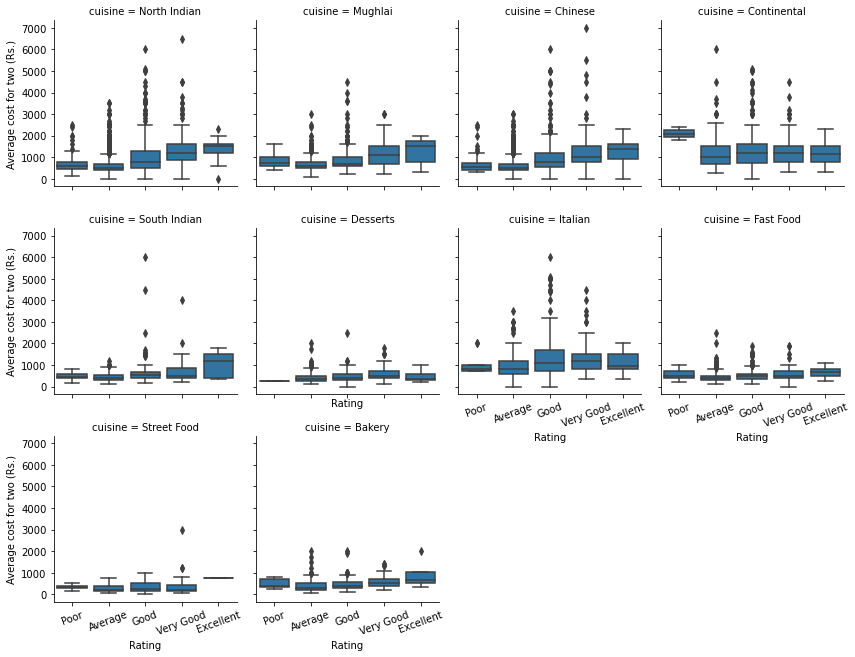

In [18]:
top_10_cuisine_df = cuisines_df.loc[cuisines_df.cuisine.isin(cuisines_order)]

# plt.title("Rating vs Average cost for two per Cuisine")
# g.fig.suptitle("Rating vs Average cost for two per Cuisine")

g = sb.FacetGrid(data = top_10_cuisine_df,col_wrap = 4,col = 'cuisine')
g.map(sb.boxplot, 'rating', 'average_cost_for_two')


g.set_xticklabels(rotation = 20)#.xticks(rotation = 15)
for ax in g.axes[5:]:
    ax.set_xlabel("Rating")
for i in [0,4,8]:
    g.axes[i].set_ylabel("Average cost for two (Rs.)")